In [12]:
import pandas as pd
import numpy as np

In [13]:
# DATA INTAKE

In [14]:
# Read in tables to dfs

In [15]:
features = pd.read_csv('features.csv')

train = pd.read_csv('train.csv')

stores = pd.read_csv('stores.csv')

test = pd.read_csv('test.csv')

feature_store = features.merge(stores, how='inner', on = "Store")

df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [16]:
# Look at datatypes and make adjustments

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [19]:
# Date can be transformed to be more granular

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df.Date.dt.year
test_df['Month'] = test_df.Date.dt.month
test_df['Day'] = test_df.Date.dt.day
test_df['WeekOfYear'] = (test_df.Date.dt.isocalendar().week)*1.0   


df = df.astype({'Year':'int32', 'Month':'int32', 'Day':'int32','WeekOfYear':'int32'})
test_df=test_df.astype({'Year':'int32', 'Month':'int32', 'Day':'int32','WeekOfYear':'int32'})

In [21]:
# DATA CLEANING

In [22]:
# Imputation of missing data

In [23]:
missing  = df.isnull().sum()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:>

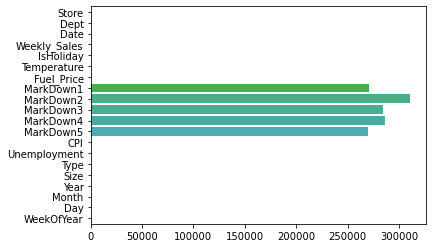

In [25]:
sns.barplot(x = missing.values, y  = missing.index)

In [26]:
# Since MarkDowns are allowed to be non-null 
# we should fill na with 0 as that is the truth for those days

In [27]:
df.fillna(0, inplace = True)

In [28]:
# EDA

In [29]:
# Time

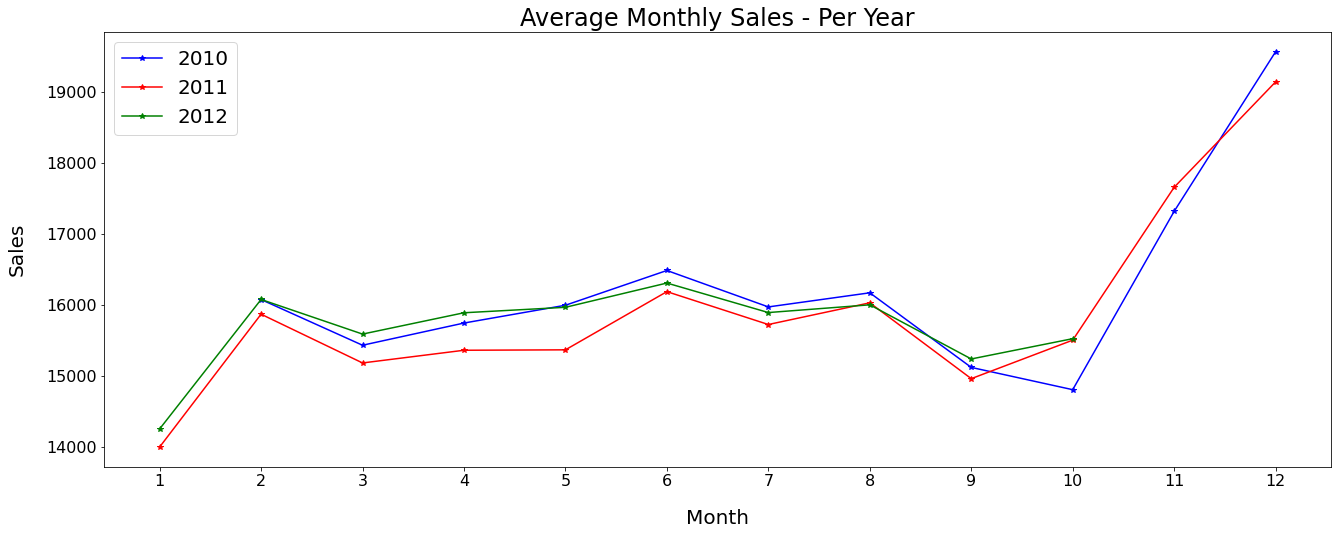

In [30]:
# How much sales each Month?

weekly_sales_2010 = df[df.Year==2010].groupby('Month')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df.Year==2011].groupby('Month')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df.Year==2012].groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, '*-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, '*-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 13, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Month', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Monthly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

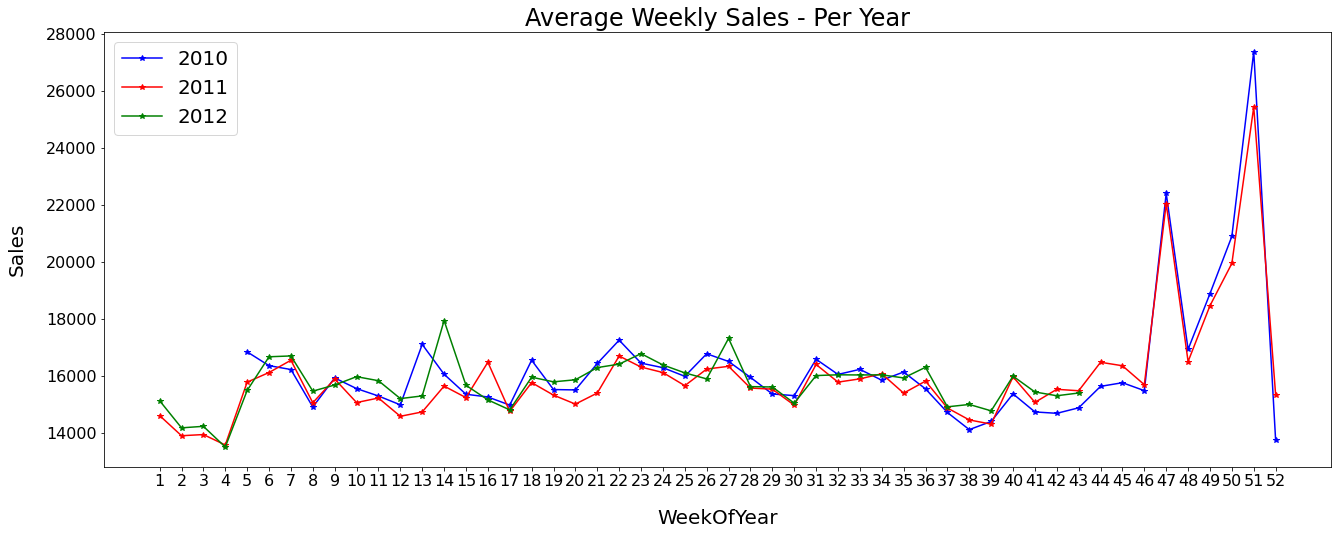

In [31]:
# How much sales each week?

weekly_sales_2010 = df[df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = df[df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = df[df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, '*-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, '*-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('WeekOfYear', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

In [32]:
# Weeks when it is holidays vs weeks when non-holidays

In [33]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [38]:
# Sales by holiday

holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_count = df.groupby('IsHoliday')['Weekly_Sales'].count()
fig = px.bar(holiday_sales, x=holiday_sales.index , 
             y=holiday_sales.values, title = 'Holiday sales', 
             color = 'Weekly_Sales', 
             color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()

In [39]:
fig = px.bar(holiday_count, x=holiday_count.index , 
             y=holiday_count.values, title = 'Holiday counts',
            color = 'Weekly_Sales', 
             color_discrete_sequence=px.colors.sequential.Sunsetdark)

fig.show()

In [40]:
# Store Types

# Fill this in at home

In [41]:
# Store Id

In [123]:
# Average sales of stores 

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

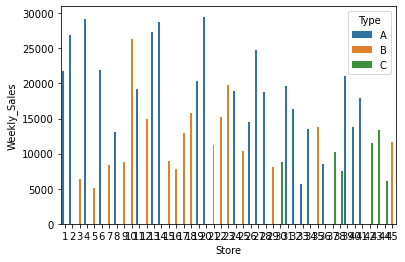

In [124]:
sns.barplot(data = df ,  x = 'Store' , y = 'Weekly_Sales', ci = None, hue = 'Type')

In [125]:
stores = df.groupby(['Store','Type'])['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')
stores

,Store,Type,Weekly_Sales
4,5,B,5053.415813
32,33,A,5728.414053
43,44,C,6038.929814
2,3,B,6373.033983
37,38,C,7492.478460
15,16,B,7863.224124
28,29,B,8158.810609
6,7,B,8358.766148
35,36,A,8584.412563
29,30,C,8764.237719


<AxesSubplot:ylabel='Weekly_Sales'>

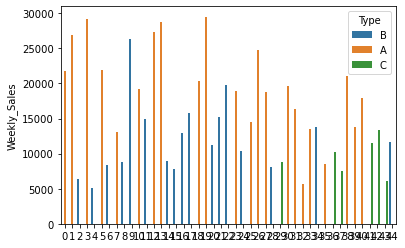

In [133]:
sns.barplot(data = stores ,  x = stores.index , y = 'Weekly_Sales', hue = 'Type')

In [132]:
stores.reset_index(drop=True)

,Store,Type,Weekly_Sales
0,5,B,5053.415813
1,33,A,5728.414053
2,44,C,6038.929814
3,3,B,6373.033983
4,38,C,7492.478460
5,16,B,7863.224124
6,29,B,8158.810609
7,7,B,8358.766148
8,36,A,8584.412563
9,30,C,8764.237719
